# Modeling

## Import Libraries and the clean salary data set

In [1]:
import time
import nltk
from nltk.corpus import stopwords

#NLP
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

#Model Data Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

#Machine Learning
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

#Deep learning
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D, Conv2D  # Updated import statement
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from scikeras.wrappers import KerasClassifier, KerasRegressor

#Deep Learning - Mixed inputs
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam, RMSprop

#Save Model
import pickle

import matplotlib.pyplot as plt

from pprint import pprint
from time import time
import logging

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(0)


In [2]:
df = pd.read_csv("df_cleaned_models.csv")
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,6,6,Experienced Data Analyst Required: Dynamic Dat...,Upwork,Anywhere,via Upwork,We are actively seeking a highly skilled and e...,"['10 hours ago', '37–75 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJFeHBlcmllbmNlZCBEYXRhIEFuYW...,NaN,...,NaN,37–75,an hour,56.0,37.0,75.0,56.0,NaN,116480.0,"['excel', 'sql']"
1,13,13,Master Data Analyst,Charles River Laboratories,United States,via Indeed,"At Charles River, we are passionate about impr...","['24 hours ago', '65K–75K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,65K–75K,a year,70000.0,65000.0,75000.0,NaN,70000.0,70000.0,"['sap', 'excel', 'word', 'powerpoint']"
2,23,23,Master Data Analyst,Charles River Laboratories,United States,via Indeed,"At Charles River, we are passionate about impr...","['24 hours ago', '65K–75K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,65K–75K,a year,70000.0,65000.0,75000.0,NaN,70000.0,70000.0,"['sap', 'excel', 'word', 'powerpoint']"
3,33,33,Master Data Analyst,Charles River Laboratories,United States,via Indeed,"At Charles River, we are passionate about impr...","['24 hours ago', '65K–75K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJNYXN0ZXIgRGF0YSBBbmFseXN0Ii...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,65K–75K,a year,70000.0,65000.0,75000.0,NaN,70000.0,70000.0,"['sap', 'excel', 'word', 'powerpoint']"
4,43,43,Data Analyst,Insight Global,Anywhere,via LinkedIn,Title: Data Analyst\n\nLocation: Remote in - F...,"['15 hours ago', '40–45 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,40–45,an hour,42.5,40.0,45.0,42.5,NaN,88400.0,['sql']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4601 non-null   int64  
 1   index                4601 non-null   int64  
 2   title                4601 non-null   object 
 3   company_name         4601 non-null   object 
 4   location             4598 non-null   object 
 5   via                  4601 non-null   object 
 6   description          4601 non-null   object 
 7   extensions           4601 non-null   object 
 8   job_id               4601 non-null   object 
 9   thumbnail            1265 non-null   object 
 10  posted_at            4601 non-null   object 
 11  schedule_type        4596 non-null   object 
 12  work_from_home       3174 non-null   float64
 13  salary               4601 non-null   object 
 14  search_term          4601 non-null   object 
 15  date_time            4601 non-null   o

In [4]:
# Drop unecessary columns
df = df.drop(columns=['thumbnail', 'commute_time'])

In [5]:
# Fill the na in `work_from_home` column with 0
df['work_from_home'].fillna(0, inplace=True)

In [6]:
# Fill the na in `salary_hourly` column with hour wage calculated from `salary_standardized`

# Define a function to convert yearly wage to hourly wage based on job type
def calculate_hourly(row):
    yearly_wage = row['salary_standardized']
    if pd.isna(yearly_wage):
        return np.nan
    
    if row['schedule_type'] == 'Full-time':
        return yearly_wage / 2080
    elif row['schedule_type'] == 'Part-time':
        return yearly_wage / 1040
    else: # for 'Contractor' or any other types
        return yearly_wage / 2080 # or any other reasonable assumption for the number of hours

# Apply this function to fill na in 'salary_hourly'
df['salary_hourly'] = df.apply(lambda row: calculate_hourly(row) if pd.isna(row['salary_hourly']) else row['salary_hourly'], axis=1)


In [7]:
# fill the na in `salary_yearly` with the values from `salary_standardized`
df['salary_yearly'].fillna(df['salary_standardized'], inplace=True)

In [8]:
# Drop rows where either 'salary_max' or 'salary_min' has missing values
df = df.dropna(subset=['salary_max', 'salary_min'])


In [9]:
missing = df.isna().sum()
missing

Unnamed: 0             0
index                  0
title                  0
company_name           0
location               3
via                    0
description            0
extensions             0
job_id                 0
posted_at              0
schedule_type          3
work_from_home         0
salary                 0
search_term            0
date_time              0
search_location        0
salary_pay             0
salary_rate            0
salary_avg             0
salary_min             0
salary_max             0
salary_hourly          0
salary_yearly          0
salary_standardized    0
description_tokens     0
dtype: int64

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
num_duplicates = df.duplicated().sum()
print(f'There are {num_duplicates} duplicate rows in the DataFrame based on title,company name, and salary_standardized.')


There are 0 duplicate rows in the DataFrame based on title,company name, and salary_standardized.


array([[<Axes: title={'center': 'salary_standardized'}>]], dtype=object)

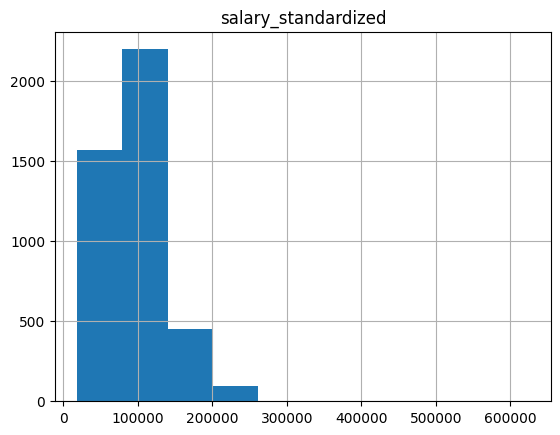

In [12]:
df.hist('salary_standardized')

In [13]:
difference = df['salary_standardized'].max() - df['salary_standardized'].min()
print('the difference between maximum salary and minimum salary is $', difference)


the difference between maximum salary and minimum salary is $ 605280.0


In [14]:
df['salary_standardized'].quantile(list(np.linspace(0,1,7)))


0.000000     18720.0
0.166667     62330.0
0.333333     75000.0
0.500000     96500.0
0.666667    107500.0
0.833333    130000.0
1.000000    624000.0
Name: salary_standardized, dtype: float64

In [15]:
#Create Bins
BINS = [0,50000,70000,90000,120000,150000,400000]

In [16]:
df['Salary_Bins'] = pd.cut(x=df['salary_standardized'], bins=BINS, labels=False)


In [17]:
df['Salary_Bins']

0       3.0
1       1.0
2       1.0
3       1.0
4       2.0
       ... 
4596    3.0
4597    4.0
4598    4.0
4599    4.0
4600    4.0
Name: Salary_Bins, Length: 4320, dtype: float64

In [18]:
df.to_csv("salary_final.csv")


<Axes: xlabel='Salary_Bins'>

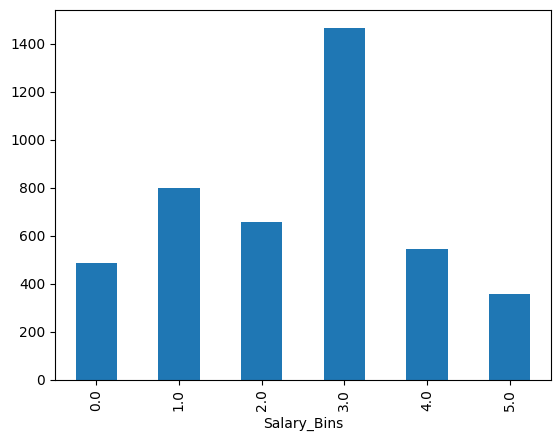

In [19]:
df.groupby('Salary_Bins')['location'].count().plot.bar()


In [20]:
#Categorical target
target_class = df['Salary_Bins'].astype('category')

In [21]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += ['www','http','com','llc','covid','non','pm','am','eg','e','g','ie','i']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)

    return pd.Series(jd_data) # Turn list of lists to series of lists to use in Word2Vec

In [22]:
data = clean_word(df['description'])

In [23]:
data[5]

["we're",
 'looking',
 'data',
 'analyst',
 'help',
 'us',
 'implement',
 'dashboard',
 'read',
 'data',
 'facebook',
 'instagram',
 'pinterest',
 'google',
 'ads',
 'klaviyo',
 'affiliate',
 'marketing',
 'etc',
 'facing',
 'problems',
 'tracking',
 'particular',
 'marketing',
 'channels',
 'correct',
 'job',
 'description',
 'develop',
 'shop',
 'specific',
 'ecommerce',
 'analytics',
 'custom',
 'metrics',
 'dimensions',
 'universal',
 'gtm',
 'container',
 'ga',
 'property',
 'shopify',
 'shops',
 'efficient',
 'maintenance',
 'updating',
 'ability',
 'see',
 'data',
 'combined',
 'per',
 'shop',
 'shops',
 'different',
 'countries',
 'need',
 'set',
 'please',
 'leave',
 'reply',
 'start',
 'blue',
 'pencil',
 'interested',
 'thank']

## Set up test and target

In [24]:
target = df['salary_standardized'] #continuous target
target_class = df['Salary_Bins'].astype('category') #categorical target

## Split Train-Test

data is tokenized job description, target_class is salary classes.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, target_class, test_size=0.1, random_state=4)

## Model 1: Use Word2Vec Embedding in Classification Models

In [26]:
data[0]

['actively',
 'seeking',
 'highly',
 'skilled',
 'experienced',
 'data',
 'analyst',
 'create',
 'advanced',
 'data',
 'analysis',
 'package',
 'package',
 'include',
 'array',
 'insightful',
 'professionally',
 'curated',
 'charts',
 'graphs',
 'coupled',
 'real',
 'time',
 'dashboard',
 'reflecting',
 'data',
 'data',
 'comprising',
 'timestamped',
 'shipments',
 'loads',
 'sourced',
 'two',
 'different',
 'ports',
 'resulting',
 'shipments',
 'daily',
 'basis',
 'data',
 'stored',
 'mariadb',
 'sql',
 'database',
 'task',
 'illuminate',
 'data',
 'way',
 'engaging',
 'also',
 'intuitive',
 'clients',
 'key',
 'tasks',
 'data',
 'visualization',
 'synthesize',
 'attractive',
 'package',
 'encapsulates',
 'summaries',
 'analysis',
 'predictions',
 'presented',
 'tabularly',
 'graphically',
 'end',
 'product',
 'self',
 'contained',
 'excel',
 'sheet',
 'easily',
 'distributed',
 'clients',
 'reflecting',
 'depth',
 'understanding',
 'data',
 'hand',
 'dashboard',
 'development',
 'cra

### Word2Vec Model from scratch

Create a Word2Vec model with 100 dimensions.

In [27]:
w2v_model1 = Word2Vec(data,
                vector_size=64,
                window=10,
                min_count=10,
                workers=4)

In [28]:
w2v_model1.train(data,total_examples=w2v_model1.corpus_count, epochs=10)

(9156279, 10234090)

In [29]:
wv = w2v_model1.wv

In [30]:
words = wv.index_to_key
print('Vocabulary size:', len(words))

Vocabulary size: 5179


In [31]:
wv.most_similar('data')

[('business', 0.5289637446403503),
 ('datasets', 0.5272043943405151),
 ('disparate', 0.5057350993156433),
 ('curation', 0.4935966730117798),
 ('analysis', 0.4904550015926361),
 ('design', 0.4860195219516754),
 ('map', 0.4847578704357147),
 ('metadata', 0.48220908641815186),
 ('extracting', 0.4744096100330353),
 ('mapping', 0.47369033098220825)]

In [32]:
#wrap into a dictionary to use in the pipeline
w2v = dict(zip(w2v_model1.wv.index_to_key, w2v_model1.wv.vectors))

In [33]:
len(w2v.values())

5179

Averaging word vectors for all words in a text.

In [34]:
#Averaging word vectors for all words in a text.

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        transformed_X = []
        for idx, vec in enumerate(transformed_X):
            if len(vec) != 64:
                print(f"Inconsistency at index {idx}: {vec}")

        for words in X:
            word_vectors = [self.word2vec[w] for w in words if w in self.word2vec]

            if not word_vectors:
                transformed_X.append(np.zeros(self.dim))
            else:
                mean_vec = np.mean(word_vectors, axis=0)
                transformed_X.append(mean_vec)
        lengths = [len(x) for x in transformed_X]
        unique_lengths = set(lengths)
        print(unique_lengths)

        return np.array(transformed_X).reshape(len(transformed_X), -1)

### Use Word2Vec in the pipeline

In [35]:
#Import libraries
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from pprint import pprint
from time import time
import logging

In [36]:
#Use pipeline 

rf =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Random Forest', RandomForestClassifier(n_estimators=50, criterion='entropy', verbose=True, n_jobs=3))])

svc = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Support Vector Machine', SVC(kernel='rbf', C=0.5))])

sgd = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
               ('Stochastic Gradient Descent', SGDClassifier(alpha=0.001, n_jobs=3))])

svr = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('SVR-lin', SVR(kernel='rbf', C=0.5))])
                
lr = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Linear Regression', LinearRegression(n_jobs=3))])

In [37]:
models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Stochastic Gradient Descent', sgd),
          ('Linear Regression', lr)]

In [38]:
nan_indices = y_train[y_train.isnull()].index
X_train = X_train.drop(nan_indices)
y_train = y_train.drop(nan_indices)

scores = [(name, cross_val_score(model, X_train, y_train, cv=2).mean()) for name, model, in models]

{64}


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.9s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.0s finished


{64}
{64}


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    0.0s finished


{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}


In [39]:
scores

[('Random Forest', 0.361740473738414),
 ('Support Vector Machine', 0.3416580844490216),
 ('Stochastic Gradient Descent', 0.29917610710607623),
 ('Linear Regression', 0.0240081551335789)]

Random Forest performed the best among three models. Explore the prediction probability.

In [40]:
rf =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=3, verbose=True, n_jobs=3))])

In [41]:
cross_val_score(rf, X_train, y_train, cv=2).mean()

{64}


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


{64}
{64}


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{64}


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


0.36431513903192586

In [42]:
rf.fit(X_train, y_train)

{64}


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.0s finished


Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x2b6fb48d0>),
                ('Random Forest',
                 RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                                        n_jobs=3, verbose=True))])

In [43]:
y_pred = rf.predict(X_test)

{64}


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


In [44]:
rf.score(X_test, y_test)

{64}


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


0.47453703703703703

In [45]:
proba_matrix = rf.predict_proba(X_test)

{64}


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    0.0s finished


In [46]:
proba_matrix.shape

(432, 6)

## Prediction Probability of each bin

In [47]:
df_proba = pd.DataFrame(data = proba_matrix)

In [48]:
df_proba.head()

,0,1,2,3,4,5
0,0.164639,0.248952,0.158276,0.267442,0.112913,0.047778
1,0.020964,0.243782,0.222433,0.020750,0.477214,0.014857
2,0.079795,0.072916,0.076058,0.680874,0.064221,0.026136
3,0.077901,0.155881,0.197821,0.298643,0.196980,0.072774
4,0.079795,0.072916,0.076058,0.680874,0.064221,0.026136


In [49]:
df_proba.describe()

,0,1,2,3,4,5
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,0.108069,0.177994,0.159152,0.343446,0.129462,0.081877
std,0.081536,0.113411,0.113866,0.194505,0.124999,0.061387
min,0.000000,0.000000,0.000000,0.020750,0.000000,0.000000
25%,0.057714,0.098385,0.087369,0.234287,0.064221,0.042761
50%,0.090475,0.168698,0.139498,0.286058,0.099260,0.074698
75%,0.137789,0.230181,0.196119,0.371482,0.141945,0.100306
max,0.576270,0.885103,0.803762,0.982281,0.779097,0.570935


In [50]:
print(target_class.isnull().sum())

4


In [51]:
print(data.isnull().sum())

0


In [52]:
target_class = target_class.dropna()

In [53]:
print(data.shape)
print(target_class.shape)

(4320,)
(4316,)


In [54]:
data = data[:len(target_class)]

In [55]:
#Grid Search: Word2Vec with Random Forest Classifier
pipeline =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('rf', RandomForestClassifier(n_jobs=3))])
parameters = {
    'rf__n_estimators':(30,40,50),
    'rf__criterion':("gini","entropy"),
    'rf__min_samples_split':(2,6,8),
    'rf__max_features':("auto","sqrt","log2")
    
}

In [56]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(data, target_class)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['Word2Vec Vectorizer', 'rf']
parameters:
{'rf__criterion': ('gini', 'entropy'),
 'rf__max_features': ('auto', 'sqrt', 'log2'),
 'rf__min_samples_split': (2, 6, 8),
 'rf__n_estimators': (30, 40, 50)}


Fitting 5 folds for each of 54 candidates, totalling 270 fits
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

{64}
done in 57.094s

Best score: 0.303
Best parameters set:
	rf__criterion: 'gini'
	rf__max_features: 'log2'
	rf__min_samples_split: 2
	rf__n_estimators: 30


In [57]:
best_rf = RandomForestClassifier(criterion='gini', max_features='sqrt', min_samples_split=6, n_estimators=40, n_jobs=3)
pipeline_best = Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)), ('Random Forest', best_rf)])
pipeline_best.fit(X_train, y_train)

{64}


Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.MeanEmbeddingVectorizer object at 0x2b7d56790>),
                ('Random Forest',
                 RandomForestClassifier(min_samples_split=6, n_estimators=40,
                                        n_jobs=3))])

In [58]:
y_pred = pipeline_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy*100:.2f}%")

{64}
Test Set Accuracy: 47.69%


In [59]:
#Grid Search: Word2Vec with Random Forest Classifier
pipeline =  Pipeline([('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
              ('rf', RandomForestClassifier(n_estimators = 30, criterion='gini', n_jobs=3, max_features='sqrt'))])
parameters = {
    'rf__class_weight':("balanced",None),
    'rf__min_samples_split':(4,6),
    'rf__max_samples':(None, 0.5,0.8,1)   
}

In [60]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['Word2Vec Vectorizer', 'rf']
parameters:
{'rf__class_weight': ('balanced', None),
 'rf__max_samples': (None, 0.5, 0.8, 1),
 'rf__min_samples_split': (4, 6)}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}


In [61]:
y_pred_best = grid_search.best_estimator_.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Set Accuracy with Best Parameters: {accuracy_best*100:.2f}%")

{64}
Test Set Accuracy with Best Parameters: 49.07%


## Using SGD with Grid Search

In [62]:
#Try SGDClassifier 
pipeline = Pipeline([
    ('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
    ('clf', SGDClassifier(n_jobs=3, early_stopping=True, validation_fraction=0.2))
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    
    'clf__alpha': (0.0001, 0.001, 0.01),
    'clf__penalty': ('l2', 'elasticnet'),
    'clf__l1_ratio':(0, 0.1, 0.3, 0.5),
    'clf__max_iter': (100,200,300)
}

In [63]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['Word2Vec Vectorizer', 'clf']
parameters:
{'clf__alpha': (0.0001, 0.001, 0.01),
 'clf__l1_ratio': (0, 0.1, 0.3, 0.5),
 'clf__max_iter': (100, 200, 300),
 'clf__penalty': ('l2', 'elasticnet')}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}

In [64]:
# Use the best estimator from the SGD grid search
best_sgd_model = grid_search.best_estimator_

# Predict on test data
sgd_predictions = best_sgd_model.predict(X_test)

# Calculate the accuracy
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"SGDClassifier Test Accuracy: {sgd_accuracy*100:.3f}")


{64}
SGDClassifier Test Accuracy: 30.324


In [65]:
# Adjusting parameters for a refined grid search
pipeline = Pipeline([
    ('Word2Vec Vectorizer', MeanEmbeddingVectorizer(w2v)),
    ('clf', SGDClassifier(n_jobs=3, early_stopping=True, validation_fraction=0.2))
])

parameters = {
    'clf__alpha': (0.005, 0.01, 0.02),
    'clf__max_iter': (150, 200, 250)
}

grid_search_refined = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search_refined.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}
{64}


GridSearchCV(estimator=Pipeline(steps=[('Word2Vec Vectorizer',
                                        <__main__.MeanEmbeddingVectorizer object at 0x2b8a76510>),
                                       ('clf',
                                        SGDClassifier(early_stopping=True,
                                                      n_jobs=3,
                                                      validation_fraction=0.2))]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.005, 0.01, 0.02),
                         'clf__max_iter': (150, 200, 250)},
             verbose=1)

In [66]:
from gensim.models import Word2Vec

model = Word2Vec(data, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

## Model 2: Count vectorizer + TF-IDF with GridSearch

In [67]:
from pprint import pprint
from time import time
import logging

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [68]:
#The input needs to be raw text
text = df['description']

In [69]:
target_class.head()

0    3.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: Salary_Bins, dtype: category
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

### Train-Test Split

In [70]:
print(text.shape)
print(target_class.shape)

(4320,)
(4316,)


In [71]:
text = text.iloc[:len(target_class)]

In [72]:
target_class = target_class.iloc[:len(text)]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(text, target_class, test_size=0.1, random_state=4)

### SGD Classifier with Grid Search

In [74]:
#Try SGDClassifier 
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df = 5, ngram_range=(1,2), stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(n_jobs=3))
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    'vect__max_df':(0.2,0.5),
    'vect__min_df':(0.01,0.05),
    #'tfidf__use_idf':(True, False),
    #'tfidf__smooth_idf':(True, False),
    'clf__alpha': (0.0001,0.001),
    'clf__loss': ('hinge', 'log'), 
    #'clf__penalty': ('l2', 'elasticnet'),
    'clf__max_iter': (100,200,500)
}

In [75]:
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.0001, 0.001),
 'clf__loss': ('hinge', 'log'),
 'clf__max_iter': (100, 200, 500),
 'vect__max_df': (0.2, 0.5),
 'vect__min_df': (0.01, 0.05)}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

done in 27.375s

Best score: 0.367
Best parameters set:
	clf__alpha: 0.001
	clf__loss: 'hinge'
	clf__max_iter: 200
	vect__max_df: 0.5
	vect__min_df: 0.01


In [76]:
SGD = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,3), stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(alpha=0.001, max_iter=500, n_jobs=3))
])

In [77]:
classifier = SGD.fit(X_train, y_train)

In [78]:
y_pred = SGD.predict(X_test)

### Confusion Matrix

In [79]:
confusion_matrix(y_test, y_pred)

array([[12, 12,  3, 17,  1,  0],
       [16, 27, 11, 22,  7,  6],
       [ 3,  6, 25, 24, 12,  1],
       [ 9, 20, 18, 80,  9,  5],
       [ 3,  8,  2, 21, 18,  7],
       [ 6,  6,  4,  8,  2,  1]])

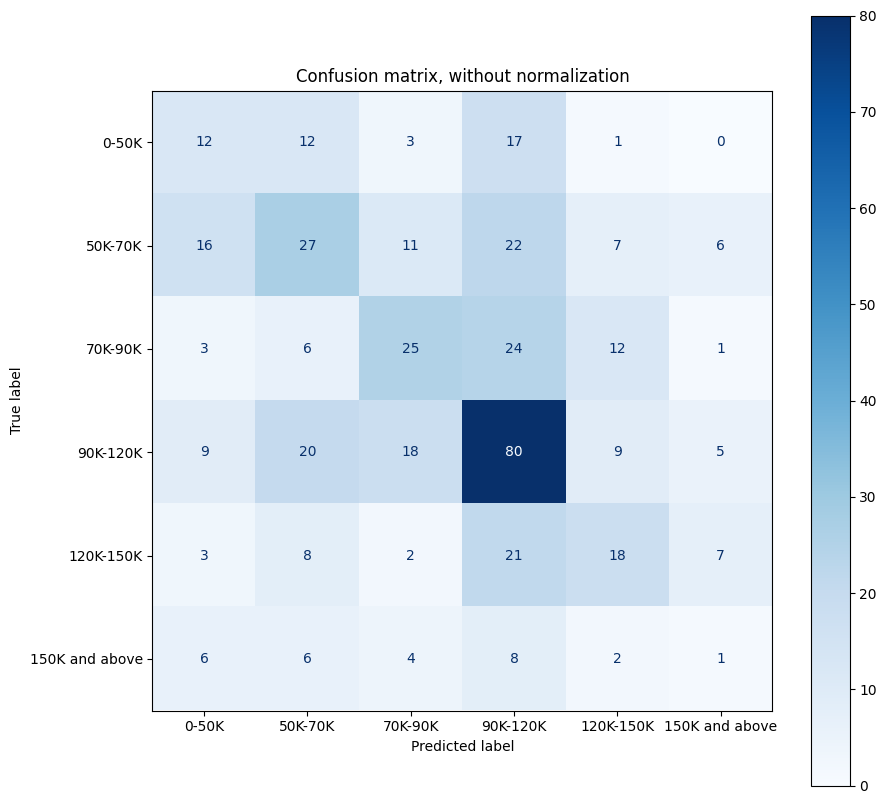

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `classifier` is your trained model
y_pred = classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Using the ConfusionMatrixDisplay class to display the confusion matrix
display_labels = ["0-50K","50K-70K","70K-90K","90K-120K",'120K-150K','150K and above']
fig, ax = plt.subplots(figsize=(10, 10))

# Set title for the axis
ax.set_title("Confusion matrix, without normalization")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(ax=ax, cmap=plt.cm.Blues)

plt.show()

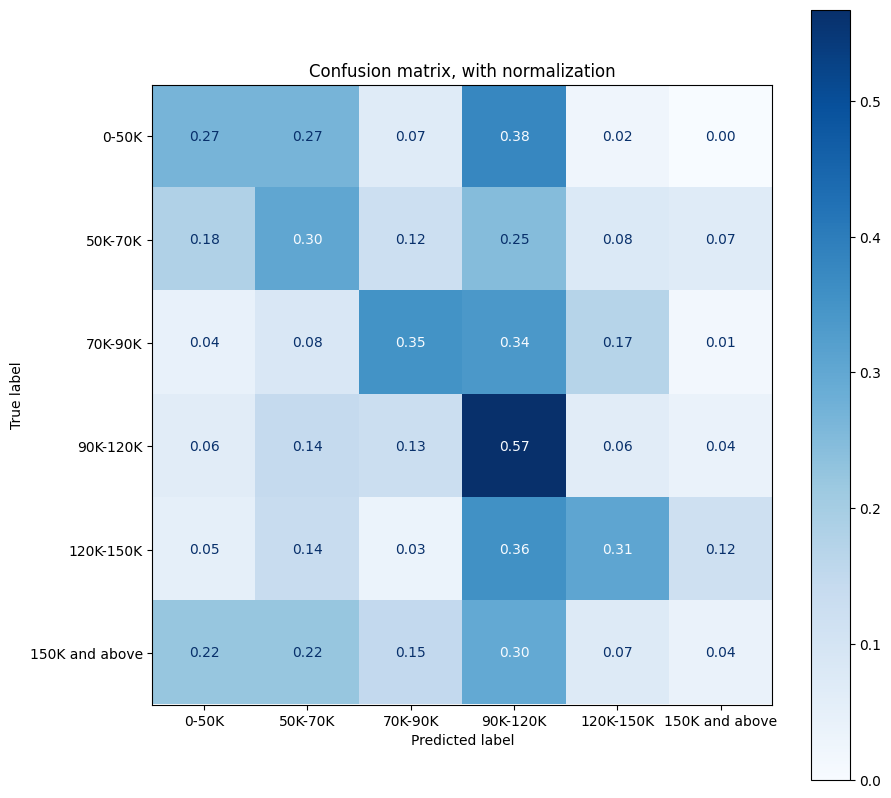

In [81]:
# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(figsize=(10, 10))

# Set title for the axis
ax.set_title("Confusion matrix, with normalization")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=display_labels)
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format=".2f")

plt.show()

In [82]:
#Mean accuracy on the given test data and labels
SGD.score(X_test, y_test)

0.3773148148148148

In [83]:
#save the model to disk
filename='finalized_model.sav'
pickle.dump(SGD, open(filename, 'wb'))

In [84]:
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.3773148148148148


### Random Forest Classifier with Grid Search

In [85]:
pipeline = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,2), stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier(n_jobs=3))
])

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
parameters = {
    
    'tfidf__use_idf':(True, False),
    'tfidf__smooth_idf':(True, False),
    'rf__n_estimators':(30,40,50),
    'rf__criterion':("gini","entropy"),
    'rf__min_samples_split':(2,6,8),
    'rf__max_features':("auto","sqrt","log2")
    
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'rf']
parameters:
{'rf__criterion': ('gini', 'entropy'),
 'rf__max_features': ('auto', 'sqrt', 'log2'),
 'rf__min_samples_split': (2, 6, 8),
 'rf__n_estimators': (30, 40, 50),
 'tfidf__smooth_idf': (True, False),
 'tfidf__use_idf': (True, False)}
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fi

done in 210.132s

Best score: 0.409
Best parameters set:
	rf__criterion: 'entropy'
	rf__max_features: 'sqrt'
	rf__min_samples_split: 2
	rf__n_estimators: 50
	tfidf__smooth_idf: True
	tfidf__use_idf: True


In [86]:
rf = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, min_df=0.03, ngram_range=(1,3), stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('rf', RandomForestClassifier(max_features='sqrt', min_samples_split=8, n_estimators=50, n_jobs=3))
])

In [87]:
rf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, min_df=0.03, ngram_range=(1, 3),
                                 stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('rf',
                 RandomForestClassifier(min_samples_split=8, n_estimators=50,
                                        n_jobs=3))])

In [88]:
y_pred = rf.predict(X_test)

In [89]:
rf.score(X_test, y_test)

0.37037037037037035

## Model 3: Use Pretrained GloVe Model

In [90]:
total_vocabulary = set(word for jd in data for word in jd)

#get glove for the limit_vocabulary 

In [91]:
max_length=len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 16982 unique tokens in the dataset.


In [92]:
#Get the appropriate vectors out of the GloVe file
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:   
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [93]:
#Each word has a 50 dimension vector space
glove['data']

array([ 5.3101e-01, -5.5869e-01,  1.7674e+00,  4.4824e-01,  2.2341e-01,
       -3.4559e-01, -7.7679e-01, -9.6117e-01,  1.1669e+00,  7.4279e-02,
        8.1470e-01, -5.9428e-02,  6.4599e-02,  1.5176e-03,  9.9179e-02,
        3.6602e-01, -9.8724e-01, -8.3913e-01,  1.5917e-01, -7.7603e-01,
        7.3474e-01, -6.4861e-01,  4.6174e-01,  8.8162e-03,  5.1738e-01,
       -6.5976e-01, -7.4010e-01, -1.3928e-01,  8.1094e-02,  2.0657e-01,
        3.5652e+00, -8.2264e-01,  5.7360e-01, -1.7268e+00,  6.2356e-03,
        6.7672e-02, -2.3411e-01,  3.5163e-02,  2.6507e-01, -2.9966e-01,
        7.4323e-01, -4.5027e-01,  1.9406e-01,  4.8611e-01, -4.3075e-01,
       -2.5210e-01,  1.2774e+00,  1.5815e+00,  6.5838e-01, -2.0978e-01],
      dtype=float32)

In [94]:
len(next(iter(glove)))

4

In [95]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

### Random Forest with Grid Search

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data, target_class, test_size=0.1, random_state=4)

In [97]:
#Use pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [98]:
import sklearn
print(sklearn.__version__)

1.3.0


In [99]:
pipeline =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('rf', RandomForestClassifier(n_jobs=3))])

parameters = {
    'rf__n_estimators':(30,50,80),
    'rf__criterion':("gini","entropy"),
    'rf__min_samples_split':(4,6,8),
    'rf__max_features':("auto","sqrt","log2")
    
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['Word2Vec Vectorizer', 'rf']
parameters:
{'rf__criterion': ('gini', 'entropy'),
 'rf__max_features': ('auto', 'sqrt', 'log2'),
 'rf__min_samples_split': (4, 6, 8),
 'rf__n_estimators': (30, 50, 80)}
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

done in 92.776s

Best score: 0.403
Best parameters set:
	rf__criterion: 'gini'
	rf__max_features: 'sqrt'
	rf__min_samples_split: 8
	rf__n_estimators: 80


In [101]:
rf = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('rf', RandomForestClassifier(n_jobs=3, criterion='gini',  max_features='sqrt', min_samples_split=8, n_estimators=80))])

In [102]:
rf.fit(X_train, y_train)

Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.W2vVectorizer object at 0x3079b2710>),
                ('rf',
                 RandomForestClassifier(min_samples_split=8, n_estimators=80,
                                        n_jobs=3))])

In [103]:
rf.score(X_test, y_test)

0.3912037037037037

### SGD Classifier in the pipeline

In [111]:
SGD =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('SGD', SGDClassifier(alpha=0.0001, max_iter=110, n_jobs=3))])

In [112]:
SGD.fit(X_train, y_train)

Pipeline(steps=[('Word2Vec Vectorizer',
                 <__main__.W2vVectorizer object at 0x307a26790>),
                ('SGD', SGDClassifier(max_iter=110, n_jobs=3))])

In [113]:
SGD.score(X_test, y_test)

0.33796296296296297

## Model 4: Deep Learning Models with Word Embeddings

In [115]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.layers  import Conv1D
from keras.layers import MaxPooling1D

from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.layers import Flatten

from keras.utils import to_categorical

import matplotlib.pyplot as plt

In [117]:
tokenizer = text.Tokenizer() 
tokenizer.num_words = 1000  #limit the number of words to keep most common 1000 words
tokenizer.fit_on_texts(list(df['description']))
list_tokenized_jd = tokenizer.texts_to_sequences(df['description'])

X_t = sequence.pad_sequences(list_tokenized_jd, maxlen=400, padding = 'post')

In [118]:
X_t.shape

(4320, 400)

In [119]:
len(list_tokenized_jd)

4320

In [120]:
#Encoding to categorical classes
y = to_categorical(target_class.values, num_classes=6, dtype="float32")

In [121]:
y.shape

(4316, 6)

### Train-Test Split

In [123]:
print(X_t.shape)
print(len(y))

(4320, 400)
4316


In [124]:
n_samples = min(X_t.shape[0], len(y))
X_t = X_t[:n_samples]
y = y[:n_samples]


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=4)

In [126]:
X_test.shape

(864, 400)

In [127]:
y_test.shape

(864, 6)

### Create a base model

In [133]:
model = Sequential()

embedding_size = 64  #each word onto a 32 length real valued vector
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400)) #try 100, 200, single LSTM and single dense 100
model.add(LSTM(100))
#model.add(LSTM(64))
#model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

In [134]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 64)           64000     
                                                                 
 lstm_4 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 flatten (Flatten)           (None, 16)               

In [135]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=[X_test, y_test])

Epoch 1/20
70/70 [==============================] - 17s 228ms/step - loss: 1.7279 - accuracy: 0.3132 - val_loss: 1.5796 - val_accuracy: 0.3507
Epoch 2/20
70/70 [==============================] - 15s 221ms/step - loss: 1.5897 - accuracy: 0.3378 - val_loss: 1.5444 - val_accuracy: 0.3507
Epoch 3/20
70/70 [==============================] - 16s 224ms/step - loss: 1.5755 - accuracy: 0.3366 - val_loss: 1.5372 - val_accuracy: 0.3507
Epoch 4/20
70/70 [==============================] - 16s 228ms/step - loss: 1.5680 - accuracy: 0.3384 - val_loss: 1.5360 - val_accuracy: 0.3507
Epoch 5/20
70/70 [==============================] - 16s 225ms/step - loss: 1.5547 - accuracy: 0.3389 - val_loss: 1.5396 - val_accuracy: 0.3495
Epoch 6/20
70/70 [==============================] - 18s 264ms/step - loss: 1.5384 - accuracy: 0.3418 - val_loss: 1.5464 - val_accuracy: 0.3507
Epoch 7/20
70/70 [==============================] - 20s 285ms/step - loss: 1.5253 - accuracy: 0.3491 - val_loss: 1.5539 - val_accuracy: 0.3484

Train: 0.412, Test: 0.341


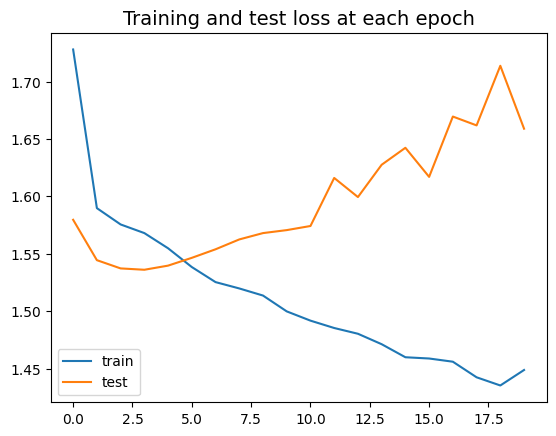

In [137]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Training and test loss at each epoch', fontsize=14)
plt.legend()
plt.show()

### Hyperparameter tuning on a regular embedding layer

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.1, random_state=4)

In [139]:
#Add Convolutional Layer and MaxPooling Layer
model = Sequential()

embedding_size = 128  #each word onto a 128 length real valued vector
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400)) #try 100, 200, single LSTM and single dense 100
model.add(Conv1D(filters=32, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
#model.add(LSTM(64))
#model.add(GlobalMaxPool1D())
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))
#model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

In [140]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 400, 128)          128000    
                                                                 
 conv1d (Conv1D)             (None, 400, 32)           12320     
                                                                 
 max_pooling1d (MaxPooling1  (None, 200, 32)           0         
 D)                                                              
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                      

In [142]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/20
122/122 [==============================] - 8s 55ms/step - loss: 1.6331 - accuracy: 0.3208 - val_loss: 1.5700 - val_accuracy: 0.3194
Epoch 2/20
122/122 [==============================] - 6s 52ms/step - loss: 1.5726 - accuracy: 0.3332 - val_loss: 1.5585 - val_accuracy: 0.3403
Epoch 3/20
122/122 [==============================] - 7s 53ms/step - loss: 1.5574 - accuracy: 0.3465 - val_loss: 1.5527 - val_accuracy: 0.3380
Epoch 4/20
122/122 [==============================] - 7s 54ms/step - loss: 1.5391 - accuracy: 0.3545 - val_loss: 1.5599 - val_accuracy: 0.3310
Epoch 5/20
122/122 [==============================] - 7s 54ms/step - loss: 1.5221 - accuracy: 0.3697 - val_loss: 1.5831 - val_accuracy: 0.3333
Epoch 6/20
122/122 [==============================] - 6s 53ms/step - loss: 1.4963 - accuracy: 0.3829 - val_loss: 1.5911 - val_accuracy: 0.3310
Epoch 7/20
122/122 [==============================] - 6s 53ms/step - loss: 1.4777 - accuracy: 0.3924 - val_loss: 1.6162 - val_accuracy: 0.3264

Train Accuracy: 0.454, Test Accuracy: 0.315


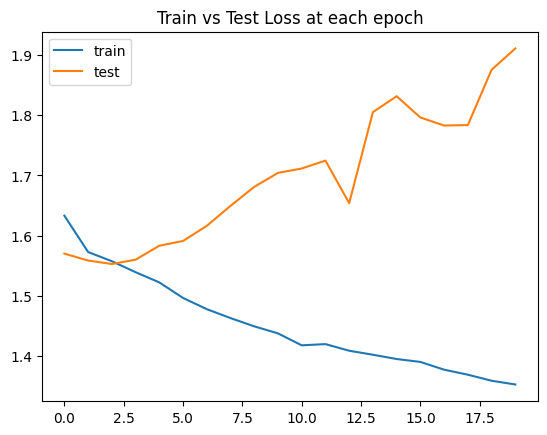

In [143]:
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Train vs Test Loss at each epoch")
plt.legend()
plt.show()

In [153]:
#Add Early Stopping layer, L1 and L2 regularization
from keras.callbacks import EarlyStopping
from keras import regularizers


model = Sequential()
embedding_size = 64  
model.add(Embedding(input_dim = 1000, output_dim = embedding_size, input_length = 400)) #try 100, 200, single LSTM and single dense 100
#Take out conv1d and maxpooling
model.add(Conv1D(filters=32, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True)) #the last LSTM doesn't need  to return sequence
#add LSTM

#add dropout here
model.add(Dense(100, activation='relu', input_shape=(400,)))
model.add(Dropout(0.5))
model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [154]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 400, 64)           64000     
                                                                 
 conv1d_5 (Conv1D)           (None, 400, 32)           6176      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 200, 32)           0         
 g1D)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 200, 128)          82432     
                                                                 
 dense_15 (Dense)            (None, 200, 100)          12900     
                                                                 
 dropout_7 (Dropout)         (None, 200, 100)          0         
                                                      

Epoch 1/30


122/122 [==============================] - 14s 109ms/step - loss: 1.5734 - accuracy: 0.3437 - val_loss: 1.5276 - val_accuracy: 0.3634
Epoch 2/30
122/122 [==============================] - 13s 109ms/step - loss: 1.5053 - accuracy: 0.3599 - val_loss: 1.5200 - val_accuracy: 0.3634
Epoch 3/30
122/122 [==============================] - 13s 110ms/step - loss: 1.4559 - accuracy: 0.3955 - val_loss: 1.6053 - val_accuracy: 0.3495
Epoch 4/30
122/122 [==============================] - 14s 113ms/step - loss: 1.3920 - accuracy: 0.4313 - val_loss: 1.5409 - val_accuracy: 0.3449
Epoch 5/30
122/122 [==============================] - 14s 111ms/step - loss: 1.2946 - accuracy: 0.4851 - val_loss: 1.6068 - val_accuracy: 0.3495
Epoch 6/30
122/122 [==============================] - 14s 114ms/step - loss: 1.1601 - accuracy: 0.5479 - val_loss: 1.7971 - val_accuracy: 0.3773
Epoch 7/30
122/122 [==============================] - 14s 113ms/step - loss: 0.9983 - accuracy: 0.6148 - val_loss: 1.8437 - val_accuracy: 0.3

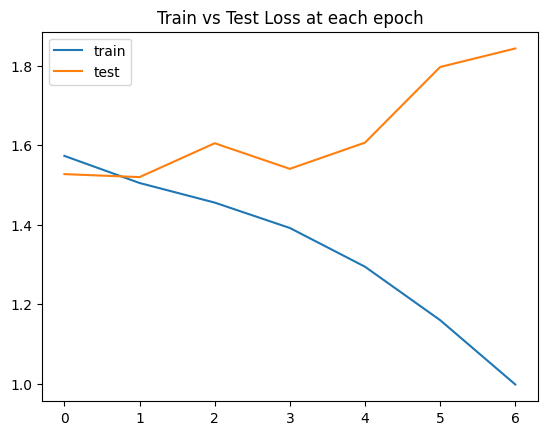

In [155]:
es = EarlyStopping(monitor='val_loss', patience = 5, mode='min', verbose=1)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=[X_test, y_test], callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Train vs Test Loss at each epoch")
plt.legend()
plt.show()

## Model 5: Use pre-trained Word2Vec as the embedding layer

In [157]:
w2v_model2 = Word2Vec(data,
                vector_size=100, #size is the number of dimensions of the N-dimensional space and Word2Vec maps the words into
                window=5,
                min_count=3, #min frequency appeared in the corpus
                workers=4)

In [158]:
w2v_model2.train(data,total_examples=w2v_model2.corpus_count, epochs=10)

(9361007, 10210380)

In [159]:
wv = w2v_model2.wv

In [160]:
#save model to be used in deep learning step
filename = 'jd_embedding_word2vec2.txt'
w2v_model2.wv.save_word2vec_format(filename, binary=False)

In [161]:
#load the word embedding as a directory of words to vectors

import os

embeddings_index = {}
f = open(os.path.join('','jd_embedding_word2vec2.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [162]:
#Get the total_vocabulary in the corpus
total_vocabulary = set(word for jd in data for word in jd)

max_length=len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 16982 unique tokens in the dataset.


In [164]:
#Convert the word embedding into tokenized vector. 
new_tokenizer = text.Tokenizer() 
new_tokenizer.num_words = 1000  #limit the number of words to keep most common 1000 words
new_tokenizer.fit_on_texts(list(df['description']))
list_tokenized_jd = new_tokenizer.texts_to_sequences(df['description'])

#pad sequences
word_index = new_tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

jd_pad = sequence.pad_sequences(list_tokenized_jd, maxlen=500, padding = 'post') 
print('Shape of the jd tensor:', jd_pad.shape)

Found 19541 unique tokens.
Shape of the jd tensor: (4320, 500)


In [165]:
#map embeddings from word2vec model for each word to new_tokenzier.word_index and create a matrix with word vectors

num_words = len(word_index)+1  #1000  + 1
embedding_matrix = np.zeros((num_words, 100)) #embedding size = 100

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [166]:
print(num_words)

19542


In [167]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers import Embedding
from keras.initializers import Constant

In [168]:
#define model
model = Sequential()

embedding_size = 100  #word2vec has a 100 dimension space
embedding_layer = Embedding(input_dim = num_words, #input_dim: size of the vocabulary
                    output_dim = embedding_size,  #dimension of the dense embedding
                    embeddings_initializer = Constant(embedding_matrix),
                    input_length = 500, #length of input sequences
                    trainable = False)
model.add(embedding_layer)
#model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

In [169]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 100)          1954200   
                                                                 
 dense_17 (Dense)            (None, 500, 128)          12928     
                                                                 
 dense_18 (Dense)            (None, 500, 32)           4128      
                                                                 
 flatten_5 (Flatten)         (None, 16000)             0         
                                                                 
 dense_19 (Dense)            (None, 6)                 96006     
                                                                 
Total params: 2067262 (7.89 MB)
Trainable params: 113062 (441.65 KB)
Non-trainable params: 1954200 (7.45 MB)
_________________________________________________________________


In [170]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [172]:
print(jd_pad.shape)
print(y.shape)

(4320, 500)
(4316, 6)


In [175]:
# Trim the datasets to make them consistent
jd_pad = jd_pad[:4316]

In [176]:
X_train, X_test, y_train, y_test = train_test_split(jd_pad, y, test_size=0.1, random_state=4)

In [177]:
#lower the learning rate since it is training too fast. Limit the input length

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=[X_test, y_test])

Epoch 1/10
122/122 [==============================] - 1s 10ms/step - loss: 1.6081 - accuracy: 0.3406 - val_loss: 1.5436 - val_accuracy: 0.3634
Epoch 2/10
122/122 [==============================] - 1s 10ms/step - loss: 1.1973 - accuracy: 0.5700 - val_loss: 1.7037 - val_accuracy: 0.4028
Epoch 3/10
122/122 [==============================] - 1s 10ms/step - loss: 0.9057 - accuracy: 0.7263 - val_loss: 1.7946 - val_accuracy: 0.3843
Epoch 4/10
122/122 [==============================] - 1s 10ms/step - loss: 0.7650 - accuracy: 0.7899 - val_loss: 1.8664 - val_accuracy: 0.3611
Epoch 5/10
122/122 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.8159 - val_loss: 1.9564 - val_accuracy: 0.3819
Epoch 6/10
122/122 [==============================] - 1s 10ms/step - loss: 0.6180 - accuracy: 0.8342 - val_loss: 2.0342 - val_accuracy: 0.3889
Epoch 7/10
122/122 [==============================] - 1s 11ms/step - loss: 0.5634 - accuracy: 0.8545 - val_loss: 2.0772 - val_accuracy: 0.3866

#### Turning the model.

In [179]:
from tensorflow.keras.optimizers.legacy import Adam

opt = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [180]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Epoch 1/100
31/31 [==============================] - 2s 67ms/step - loss: 2.3094 - accuracy: 0.3239 - val_loss: 1.5898 - val_accuracy: 0.3333
Epoch 2/100
31/31 [==============================] - 2s 63ms/step - loss: 1.5601 - accuracy: 0.3458 - val_loss: 1.5703 - val_accuracy: 0.3264
Epoch 3/100
31/31 [==============================] - 2s 63ms/step - loss: 1.4886 - accuracy: 0.3829 - val_loss: 1.5765 - val_accuracy: 0.3426
Epoch 4/100
31/31 [==============================] - 2s 63ms/step - loss: 1.4426 - accuracy: 0.4009 - val_loss: 1.5430 - val_accuracy: 0.3519
Epoch 5/100
31/31 [==============================] - 2s 63ms/step - loss: 1.3892 - accuracy: 0.4385 - val_loss: 1.5483 - val_accuracy: 0.3611
Epoch 6/100
31/31 [==============================] - 2s 64ms/step - loss: 1.3322 - accuracy: 0.4632 - val_loss: 1.5694 - val_accuracy: 0.3519
Epoch 7/100
31/31 [==============================] - 2s 63ms/step - loss: 1.2627 - accuracy: 0.5039 - val_loss: 1.6115 - val_accuracy: 0.3472
Epoch 

#### Grid Search

In [188]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def create_model(learn_rate=0.001):
    embedding_layer = Embedding(input_dim=num_words,
                                output_dim=embedding_size,
                                embeddings_initializer=Constant(embedding_matrix),
                                input_length=500,
                                trainable=False)
    sequence_input = Input(shape=(500,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Conv1D(128, 5, activation='relu')(embedded_sequences)
    x = MaxPooling1D(3)(x)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    preds = Dense(6, activation='softmax')(x)

    model = Model(sequence_input, preds)
    optimizer = Adam(learning_rate=learn_rate)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, learn_rate=0.001, epochs=10, batch_size=10, verbose=0)

param_grid = {
    'learn_rate': [0.001, 0.005, 0.01, 0.05]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [189]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.348863 using {'learn_rate': 0.001}
0.348863 (0.016138) with: {'learn_rate': 0.001}
0.329302 (0.006418) with: {'learn_rate': 0.005}
0.344230 (0.006824) with: {'learn_rate': 0.01}
0.342171 (0.006200) with: {'learn_rate': 0.05}


#### Try Count Vectorizer and TFIDF in Deep Learning Models with Grid Search

In [191]:
text = df['description']


In [192]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer(max_features = 300, max_df = 0.5, min_df = 0.03, ngram_range=(1,3), stop_words='english')
word_count_vector = count_vectorizer.fit_transform(text)

In [193]:
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [195]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count_vectorizer.get_feature_names_out(), columns=['idf_weights'])

In [196]:
df_idf.sort_values(by=['idf_weights'], ascending=False)

,idf_weights
edward,4.473402
edward jones,4.473402
jones,4.465967
places work,4.401429
branch,4.380810
...,...
working,1.863003
ability,1.860264
strong,1.849924
sql,1.811162


In [197]:
tfidf_mat = tfidf_transformer.transform(word_count_vector)

In [198]:
type(tfidf_mat)

scipy.sparse._csr.csr_matrix

In [199]:
#Each job description has 300 features, each feature is one word
tfidf_mat

<4320x300 sparse matrix of type '<class 'numpy.float64'>'
	with 268123 stored elements in Compressed Sparse Row format>

In [200]:
#Encoding to categorical classes
y = to_categorical(target_class.values, num_classes=6, dtype="float32")

In [202]:
min_len = min(tfidf_mat.shape[0], len(y))
tfidf_mat = tfidf_mat[:min_len]
y = y[:min_len]

In [203]:
#Train - Test split
X_train, X_test, y_train, y_test = train_test_split(tfidf_mat, y, test_size=0.2)

In [204]:
model = Sequential()
model.add(Dense(100, input_shape=(300,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Flatten())   #add Flatten layer 
model.add(Dense(6, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.001)
#Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt,
          metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 100)               30100     
                                                                 
 dense_30 (Dense)            (None, 64)                6464      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 6)                 390       
                                                                 
Total params: 36954 (144.35 KB)
Trainable params: 36954 (144.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [207]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)


In [210]:
print(y_train.shape)
print(y_test.shape)

(3452, 6, 6)
(864, 6, 6)


In [212]:
y_train = y_train.sum(axis=1)
y_test = y_test.sum(axis=1)

In [213]:
es = EarlyStopping(monitor='val_loss', patience = 10, mode='min', verbose=1)

history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), epochs=40, batch_size=64, callbacks=[es])


Epoch 1/40


ValueError: Creating variables on a non-first call to a function decorated with tf.function.